# Titanic Analysis

In this exercice, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

We first load `matplotlib`, `numpy` and `pandas` as usual.

In [9]:
import matplotlib
import numpy as np
import pandas as pd

Then, we are loading the dataset (csv file) with Pandas

In [10]:
titanic_df = pd.read_csv('ML_Titanic_dataset.csv')

## Data exploration

Let's explore the dataset with the usual methods :
- `shape`,
- `dtypes`,
- `describe()`,
- `info()`,
- `isnull().sum()`).

In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_df.shape

(891, 12)

In [13]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

As a consequence, we want to get rid of the `Cabin` in `titanic_df` using the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function.

In [ ]:
titanic_df.drop('Cabin',axis = 1,inplace = True)

In [ ]:
titanic_df.columns

## Classes Analysis

Let's have a look at the ticket divide.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [17]:
titanic_df['Pclass'].unique()

array([3, 1, 2])

In [18]:
titanic_df.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [29]:
pclass_df = titanic_df.groupby("Pclass").count()['PassengerId']

In [30]:
pclass_df

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [31]:
pclass_df = pclass_df.to_frame(name = 'count')
pclass_df 

,count
Pclass,
1,216
2,184
3,491


Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built in the previous question as a barchart

<Axes: xlabel='Pclass'>

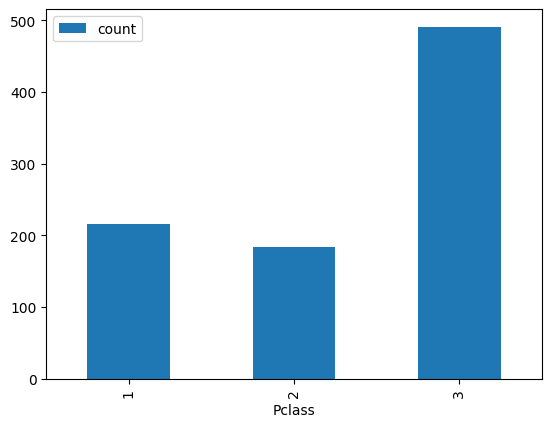

In [32]:
pclass_df.plot(kind= 'bar')

Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

<Axes: xlabel='Pclass'>

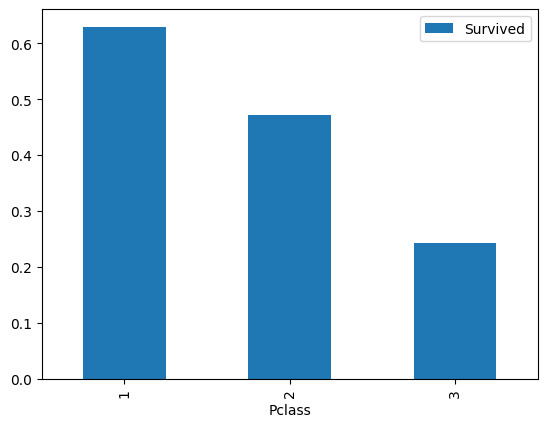

In [33]:
titanic_df[['Pclass','Survived']].groupby('Pclass').mean().plot(kind='bar')

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [48]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

❓ Plot a barchart of survival frequency of each gender. Who survived the most?

<Axes: xlabel='Sex'>

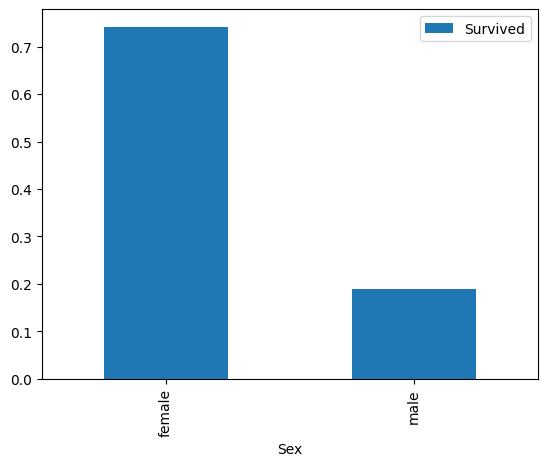

In [49]:
titanic_df[['Sex','Survived']].groupby('Sex').mean().plot(kind='bar')

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

In [61]:
titanic_df[['Sex','Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [62]:
survivors_df = titanic_df[['Sex','Survived']].groupby('Sex').sum()
survivors_df

,Survived
Sex,
female,233
male,109


In [69]:
survivors_df['Total'] = titanic_df[['Sex','Survived']].groupby('Sex').count()
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577


<Axes: xlabel='Sex'>

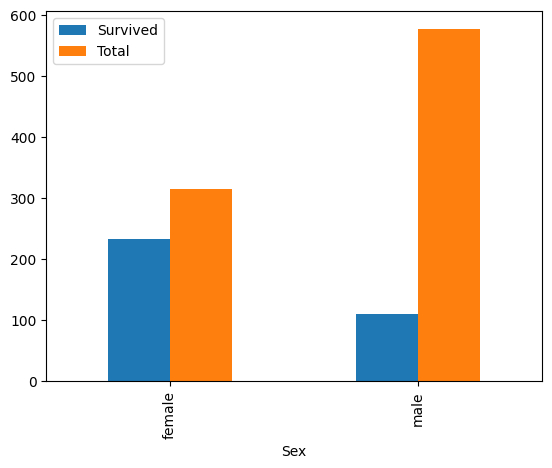

In [71]:
survivors_df.plot(kind = 'bar')

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [74]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [77]:
condition = titanic_df['Age'] <= 17
children_df = titanic_df[condition]
children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


❓ How many children were there in the Titanic?

In [78]:
children_df.shape

(113, 12)

In [80]:
children_df.shape[0]

113

❓ How many children survived?

In [85]:
children_df['Survived'].sum()

61

❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [86]:
children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


In [92]:
children_df[['Survived', 'Sex']].groupby('Sex').count()

,Survived
Sex,
female,55
male,58


In [95]:
children_gender_df = children_df[['Survived', 'Sex']].groupby('Sex').sum()

In [96]:
children_df[['Survived','Sex']].head()

,Survived,Sex
7,0,male
9,1,female
10,1,female
14,0,female
16,0,male


In [97]:
children_df[['Survived','Sex']].groupby('Sex').sum()

,Survived
Sex,
female,38
male,23


In [98]:
children_df[['Survived','Sex']].groupby('Sex').count()

,Survived
Sex,
female,55
male,58


In [99]:
children_gender_df = children_df[['Survived','Sex']].groupby('Sex').sum()
children_gender_df['Total'] = children_df[['Survived','Sex']].groupby('Sex').count()
children_gender_df.loc['children'] = [0,0]
children_gender_df

,Survived,Total
Sex,,
female,38,55
male,23,58
children,0,0


In [100]:
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577


<Axes: xlabel='Sex'>

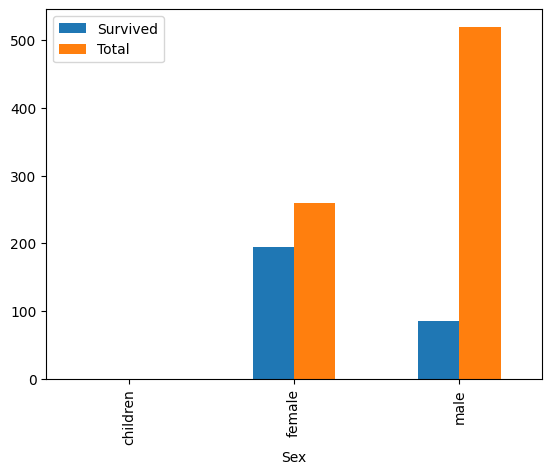

In [103]:
(survivors_df - children_gender_df).plot(kind = 'bar')

## Big families

❓ Find out if it was harder for bigger families to survive?
  
Here you create a new column in your `DataFrame` for the family size of the passenger.

In [ ]:
titanic_df.columns

In [ ]:
titanic_df['SibSp']+titanic_df['Parch']

In [ ]:
titanic_df['family_size'] = titanic_df['SibSp']+titanic_df['Parch']

In [ ]:
titanic_df['family_size'].head()

In [ ]:
titanic_df.groupby('family_size').mean()

In [ ]:
titanic_df.groupby('family_size').mean()['Survived'].plot(kind = 'bar')

## Distinguished titles

❓ Were passengers with distinguished titles preferred during the evacuation?
   
With some string manipulation, create a new column for each user with their title

In [ ]:
titanic_df['Name'].head(2)

In [ ]:
titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()).head(2)

In [ ]:
titanic_df['Name'].apply(lambda x: x.split(',')[1])

In [ ]:
titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
titanic_df['Title'].unique()

In [ ]:
titanic_df.groupby('Title').count()

In [ ]:
titanic_df.groupby('Title').count()['PassengerId'].plot(kind = 'bar',logy = True)

In [ ]:
titanic_df.groupby('Title').mean()['Survived'].plot(kind = 'bar')